# Task: Build a model that can predict if a certain employee will leave the company or not

In this task, we will investgate `four machine leaning models` on the given data and use appropriate metrics to measure the performance of them. 

#### Import all required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import warnings

%matplotlib inline

seed = 100

warnings.filterwarnings("ignore")

#### Load data

In [2]:
#laod data
employee = pd.read_csv('HR_comma_sep__281_29__281_29.csv')

# first five rows
employee.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**Each row is dedicated for a different employee.**

In [3]:
#rename columns for easy understanding
employee = employee.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'numberProject',
                        'average_montly_hours': 'averageMonthlyHrs',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion5yrs',
                        'sales' : 'department',
                        'left' : 'turnover'})

#rearrange columns
employee = employee[['satisfaction', 'evaluation','numberProject',
                    'averageMonthlyHrs','yearsAtCompany',
                     'workAccident', 'promotion5yrs',
                     'department', 'salary', 'turnover']]


Before applying machine learning algorithm, it is mandatory to perform some preprocessing steps such as label encoding, removing duplicates, treat outliers and so on.

## Preprocessing

### Label encoding

In [4]:
# Encode labels in department and salary attributes.
encode_label = ['department', 'salary']

#store label_encoding result in encode_result
encode_result = dict()

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

for label in encode_label:
    employee[label]= label_encoder.fit_transform(employee[label])
    encode_mapping = list(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    encode_result[label] = encode_mapping

print(encode_result)

{'department': [('IT', 0), ('RandD', 1), ('accounting', 2), ('hr', 3), ('management', 4), ('marketing', 5), ('product_mng', 6), ('sales', 7), ('support', 8), ('technical', 9)], 'salary': [('high', 0), ('low', 1), ('medium', 2)]}


### Remove duplicates

In [5]:
#duplicate values frequency
employee.duplicated().sum()

3008

This corresponds to about 20% of the total datapoints. One similar datapoint is retained and other datapoints are removed. Presence of duplicate values could lead to overfitting.

In [6]:
#remove duplicates
employee.drop_duplicates(inplace=True)

In [7]:
employee.shape

(11991, 10)

### Outliers

<AxesSubplot:xlabel='satisfaction'>

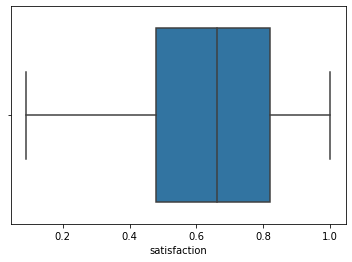

In [8]:
sns.boxplot(employee.satisfaction)

<AxesSubplot:xlabel='evaluation'>

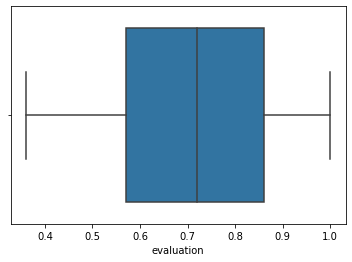

In [9]:
sns.boxplot(employee.evaluation)

<AxesSubplot:xlabel='numberProject'>

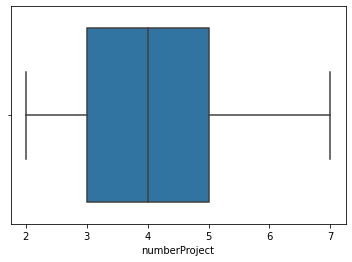

In [10]:
sns.boxplot(employee.numberProject)

<AxesSubplot:xlabel='averageMonthlyHrs'>

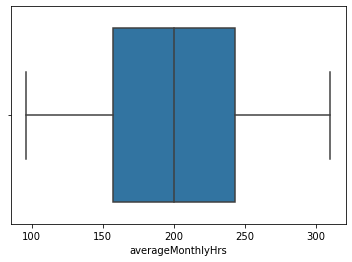

In [11]:
sns.boxplot(employee.averageMonthlyHrs)

<AxesSubplot:xlabel='yearsAtCompany'>

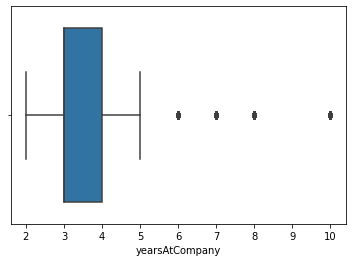

In [12]:
sns.boxplot(employee.yearsAtCompany)

From the above plots, we can the infer the following:
- yearsAtCompany has few outliers. These points cannot be removed since duration of an employee has been associated with the company.
- Removing important datapoints lead to bad performance.

### Feature scaling

Data is Normalised using Min-Max Scaler since the data does not have too many outliers.

In [13]:
#min max scaler
minmax = preprocessing.MinMaxScaler()
data = minmax.fit_transform(employee)
data = pd.DataFrame(data)
data.columns = employee.columns
data.head()

,satisfaction,evaluation,numberProject,averageMonthlyHrs,yearsAtCompany,workAccident,promotion5yrs,department,salary,turnover
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,0.0,0.777778,0.5,1.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,0.0,0.777778,1.0,1.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,0.0,0.777778,1.0,1.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,0.0,0.777778,0.5,1.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,0.0,0.777778,0.5,1.0


### Performance metrics

**AUC-ROC** curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.

In [14]:
# assign features and targets
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=seed)

### Logistic Regression

In [15]:
# Create a Logistic regression classifier
lr = LogisticRegression()

# Fit the model
lr.fit(X_train, y_train)

# Train the model using training set
lr_pred = lr.predict(X_test)

print ("---Logistic Regression Model---")
lr_auc = roc_auc_score(y_test, lr_pred)
print ("Logistic Regression AUC = %2.2f" % lr_auc)
print("Accuracy = ", round(accuracy_score(y_test, lr_pred),2)) 
print()
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

---Logistic Regression Model---
Logistic Regression AUC = 0.58
Accuracy =  0.83

[[1905   97]
 [ 316   81]]
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      2002
         1.0       0.46      0.20      0.28       397

    accuracy                           0.83      2399
   macro avg       0.66      0.58      0.59      2399
weighted avg       0.79      0.83      0.80      2399



### KNN classifier

In [16]:
# Create a KNN classifier
knn = KNeighborsClassifier()

# Fit the model
knn.fit(X_train, y_train)

# Train the model using training set
knn_pred = knn.predict(X_test)

print ("---KNN Classifier Model---")
knn_auc = roc_auc_score(y_test, knn_pred)
print ("KNN Classifier AUC = %2.2f" % knn_auc)
print("Accuracy = ", round(accuracy_score(y_test, knn_pred),2)) 
print()
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

---KNN Classifier Model---
KNN Classifier AUC = 0.93
Accuracy =  0.96

[[1939   63]
 [  43  354]]
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      2002
         1.0       0.85      0.89      0.87       397

    accuracy                           0.96      2399
   macro avg       0.91      0.93      0.92      2399
weighted avg       0.96      0.96      0.96      2399



### Random Forest classification

In [17]:
# Create a random forest classifier
rf = RandomForestClassifier()

# Fit the model
rf.fit(X_train, y_train)

# Train the model using training set
rf_pred = rf.predict(X_test)

print ("---Random Forest Classifier Model---")
rf_auc = roc_auc_score(y_test, rf_pred)
print ("Random Forest AUC = %2.2f" % rf_auc)
print("Accuracy = ", round(accuracy_score(y_test, rf_pred),2)) 
print()
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

---Random Forest Classifier Model---
Random Forest AUC = 0.96
Accuracy =  0.98

[[1998    4]
 [  34  363]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2002
         1.0       0.99      0.91      0.95       397

    accuracy                           0.98      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399



### Naive Bayes

In [18]:
# Create a naive bayes classifier
gnb = GaussianNB()

# Fit the model
gnb.fit(X_train, y_train)

# Train the model using training set
gnb_pred = gnb.predict(X_test)

print ("---Naive Bayes Classifier Model---")
gnb_auc = roc_auc_score(y_test, gnb_pred)
print ("Naive Bayes AUC = %2.2f" % gnb_auc)
print("Accuracy = ", round(accuracy_score(y_test, gnb_pred),2)) 
print()
print(confusion_matrix(y_test, gnb_pred))
print(classification_report(y_test, gnb_pred))

---Naive Bayes Classifier Model---
Naive Bayes AUC = 0.77
Accuracy =  0.84

[[1759  243]
 [ 132  265]]
              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90      2002
         1.0       0.52      0.67      0.59       397

    accuracy                           0.84      2399
   macro avg       0.73      0.77      0.74      2399
weighted avg       0.86      0.84      0.85      2399



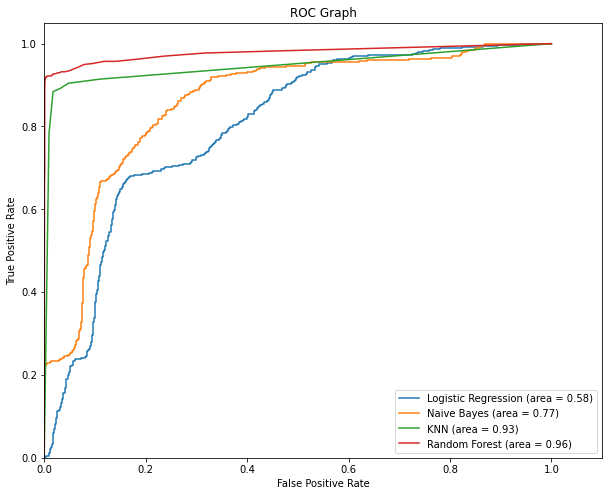

In [19]:
# ROC Graph

#logistic regression
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
#naive bayes
gnb_fpr, gnb_tpr, gnb_thresholds = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
#knn
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
#random forest
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.figure(figsize=(10,8))

# Plot Logistic Regression ROC
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_score(y_test, lr.predict(X_test)))

# Plot Naive Bayes ROC
plt.plot(gnb_fpr, gnb_tpr, label='Naive Bayes (area = %0.2f)' % roc_auc_score(y_test, gnb.predict(X_test)))

# Plot KNN ROC
plt.plot(knn_fpr, knn_tpr, label='KNN (area = %0.2f)' % roc_auc_score(y_test, knn.predict(X_test)))

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % roc_auc_score(y_test, rf.predict(X_test)))


plt.xlim([0.0, 1.10])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

## Random Forest have performed better than others.

### Feature Importance <br>

Feature Importance refers to techniques that calculate a score for all the input features for a given model — the scores simply represent the “importance” of each feature. A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable.*

I will use random forest to find the list of specific features that have considerable impact on the target value.

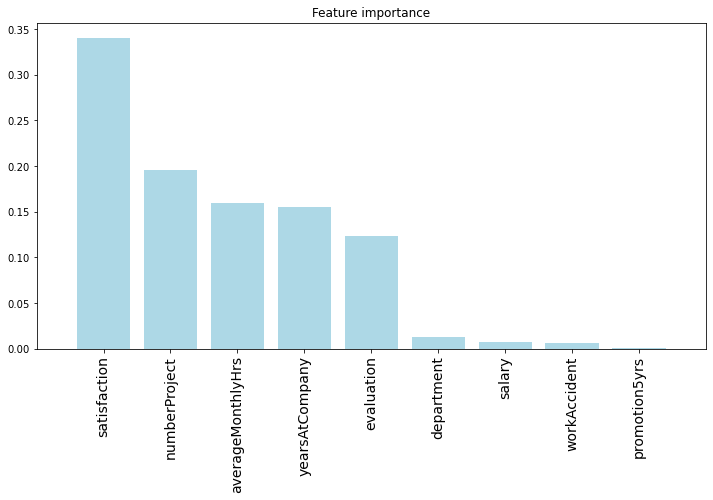

In [20]:
# Feature Importance using random forest

plt.rcParams['figure.figsize'] = (12,6)

## plot the importances ##
importances = rf.feature_importances_
feat_names = data.drop(['turnover'],axis=1).columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importance")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

##### Satisfaction is the most important feature that can predict if a certain employee will leave the company or not followed by Number of projects in a year, time spent in the company, average monthly hours and evaluation.

### Conclusion

- On Comparing the performance of algorithms, the highest accuracy is 0.96 obtained by Random Forest. Random Forest is robust to outliers, data is not overfitted and works best for categorical data.
- AUC-ROC is used as the main model evaluater.